In [16]:
library(tree)
library(rpart)
library(rpart.plot)
library(caret)

# HMEQ Data Classification

## 데이터 불러오기 

In [2]:
hmeq <- read.csv("hmeq-1.csv", header = T)

In [3]:
str(hmeq)

'data.frame':	5960 obs. of  13 variables:
 $ BAD    : int  1 1 1 1 0 1 1 1 1 1 ...
 $ LOAN   : int  1100 1300 1500 1500 1700 1700 1800 1800 2000 2000 ...
 $ MORTDUE: num  25860 70053 13500 NA 97800 ...
 $ VALUE  : num  39025 68400 16700 NA 112000 ...
 $ REASON : Factor w/ 3 levels "","DebtCon","HomeImp": 3 3 3 1 3 3 3 3 3 3 ...
 $ JOB    : Factor w/ 7 levels "","Mgr","Office",..: 4 4 4 1 3 4 4 4 4 6 ...
 $ YOJ    : num  10.5 7 4 NA 3 9 5 11 3 16 ...
 $ DEROG  : int  0 0 0 NA 0 0 3 0 0 0 ...
 $ DELINQ : int  0 2 0 NA 0 0 2 0 2 0 ...
 $ CLAGE  : num  94.4 121.8 149.5 NA 93.3 ...
 $ NINQ   : int  1 0 1 NA 0 1 1 0 1 0 ...
 $ CLNO   : int  9 14 10 NA 14 8 17 8 12 13 ...
 $ DEBTINC: num  NA NA NA NA NA ...


In [4]:
dim(hmeq)

[1] 5960   13

In [5]:
attach(hmeq)

In [6]:
hmeq$BAD <- as.factor(hmeq$BAD)

팩터로 변환

In [7]:
by(hmeq, BAD, summary)

BAD: 0
 BAD           LOAN          MORTDUE           VALUE            REASON    
 0:4771   Min.   : 1700   Min.   :  2619   Min.   :  8000          : 204  
 1:   0   1st Qu.:11700   1st Qu.: 47484   1st Qu.: 67298   DebtCon:3183  
          Median :16900   Median : 66839   Median : 90659   HomeImp:1384  
          Mean   :19028   Mean   : 74829   Mean   :102596                 
          3rd Qu.:23500   3rd Qu.: 93068   3rd Qu.:120616                 
          Max.   :89900   Max.   :371003   Max.   :471827                 
                          NA's   :412      NA's   :7                      
      JOB            YOJ             DEROG            DELINQ      
        : 256   Min.   : 0.000   Min.   :0.0000   Min.   :0.0000  
 Mgr    : 588   1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Office : 823   Median : 7.000   Median :0.0000   Median :0.0000  
 Other  :1834   Mean   : 9.155   Mean   :0.1342   Mean   :0.2451  
 ProfExe:1064   3rd Qu.:13.000   3rd Qu.:0.0000   3rd Qu.:

BAD의 그룹에 따른  summary

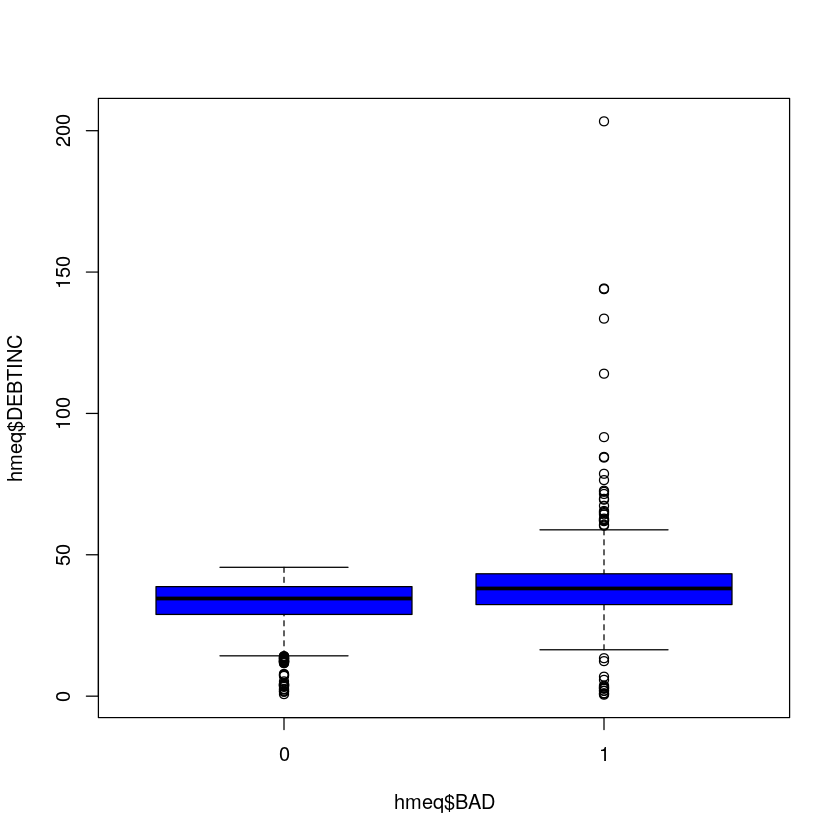

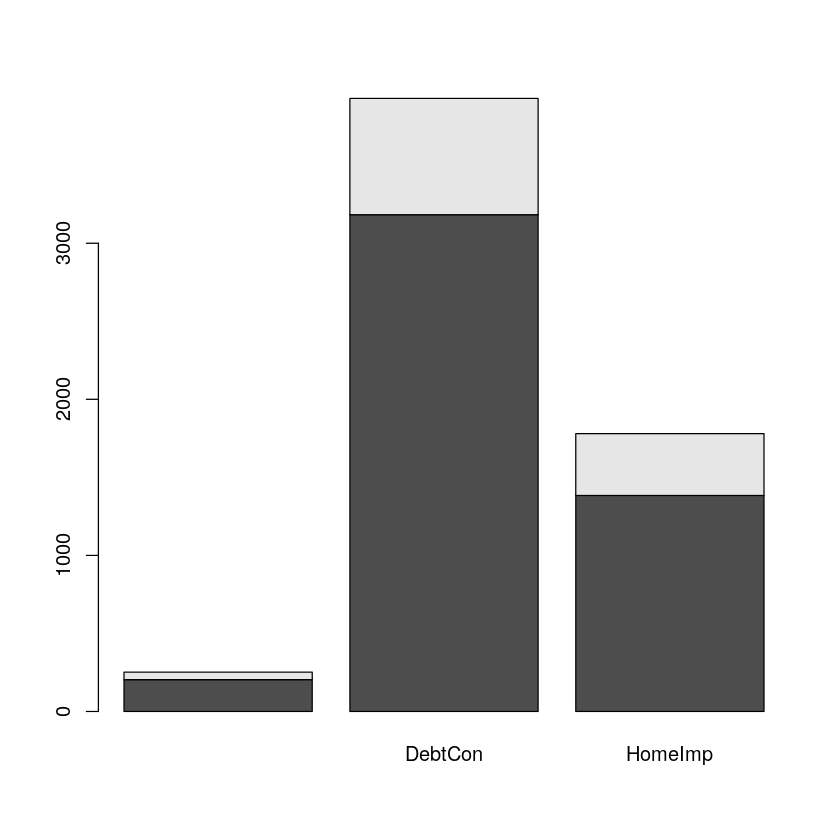

In [8]:
boxplot(hmeq$DEBTINC~hmeq$BAD, col="Blue")
barplot(table(hmeq$BAD, hmeq$REASON))

## 데이터 분리 

In [9]:
set.seed(1234) 
ind <- sample(2, nrow(hmeq), replace=TRUE, prob=c(0.7, 0.3))
trainData <- hmeq[ind==1,];dim(trainData)
testData <- hmeq[ind==2,] ;dim(testData)

[1] 4201   13

[1] 1759   13

## 모델 학습 

In [10]:
hmeq_train <- tree(BAD~., data=trainData)

In [12]:
summary(hmeq_train)


Classification tree:
tree(formula = BAD ~ ., data = trainData)
Variables actually used in tree construction:
[1] "DEBTINC" "DELINQ"  "DEROG"   "VALUE"   "LOAN"    "CLAGE"   "JOB"    
[8] "NINQ"   
Number of terminal nodes:  13 
Residual mean deviance:  0.3464 = 859.5 / 2481 
Misclassification error rate: 0.05172 = 129 / 2494 

In [13]:
hmeq_train

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 2494 1446.000 0 ( 0.91540 0.08460 )  
    2) DEBTINC < 43.7045 2414 1108.000 0 ( 0.93911 0.06089 )  
      4) DELINQ < 4.5 2404 1051.000 0 ( 0.94301 0.05699 )  
        8) DEROG < 1.5 2333  928.300 0 ( 0.94985 0.05015 )  
         16) VALUE < 48580.5 138  133.600 0 ( 0.81159 0.18841 )  
           32) LOAN < 12750 55   74.770 0 ( 0.58182 0.41818 ) *
           33) LOAN > 12750 83   25.810 0 ( 0.96386 0.03614 ) *
         17) VALUE > 48580.5 2195  757.500 0 ( 0.95854 0.04146 )  
           34) CLAGE < 109.268 376  223.600 0 ( 0.91223 0.08777 )  
             68) JOB: ,Mgr,Office,Other,ProfExe 371  198.500 0 ( 0.92453 0.07547 )  
              136) NINQ < 3.5 347  147.300 0 ( 0.94524 0.05476 ) *
              137) NINQ > 3.5 24   31.760 0 ( 0.62500 0.37500 )  
                274) JOB: Mgr,ProfExe 13    0.000 0 ( 1.00000 0.00000 ) *
                275) JOB: Office,Other 11   10.430 1 ( 0.18182 0.81818 ) *


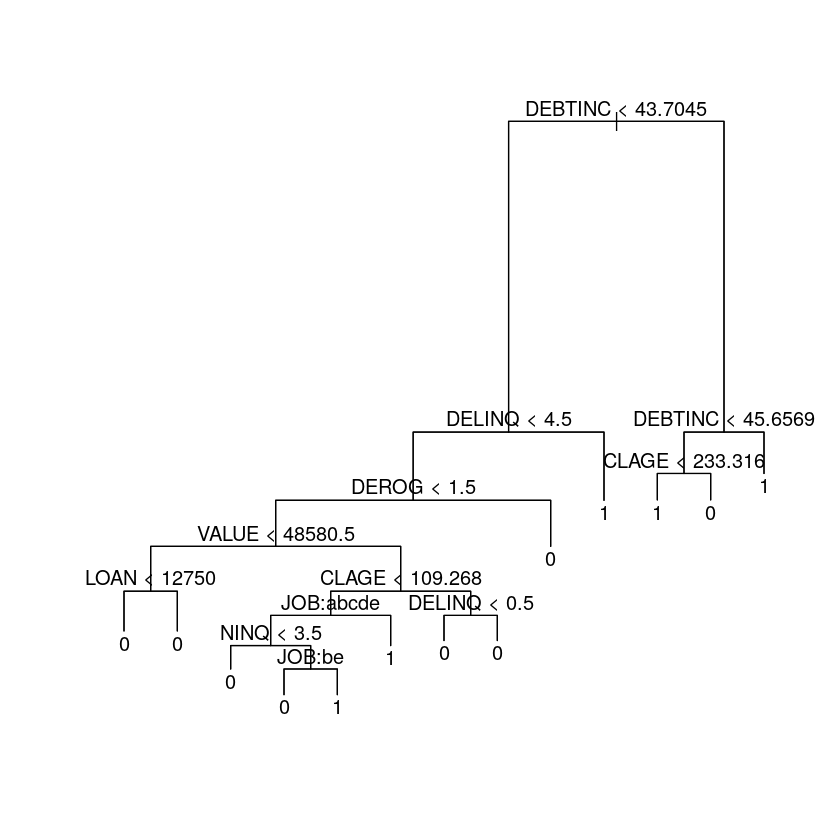

In [14]:
plot(hmeq_train)
text(hmeq_train)

## 가지치기 

In [15]:
hmeq.train1=prune.misclass(hmeq_train)

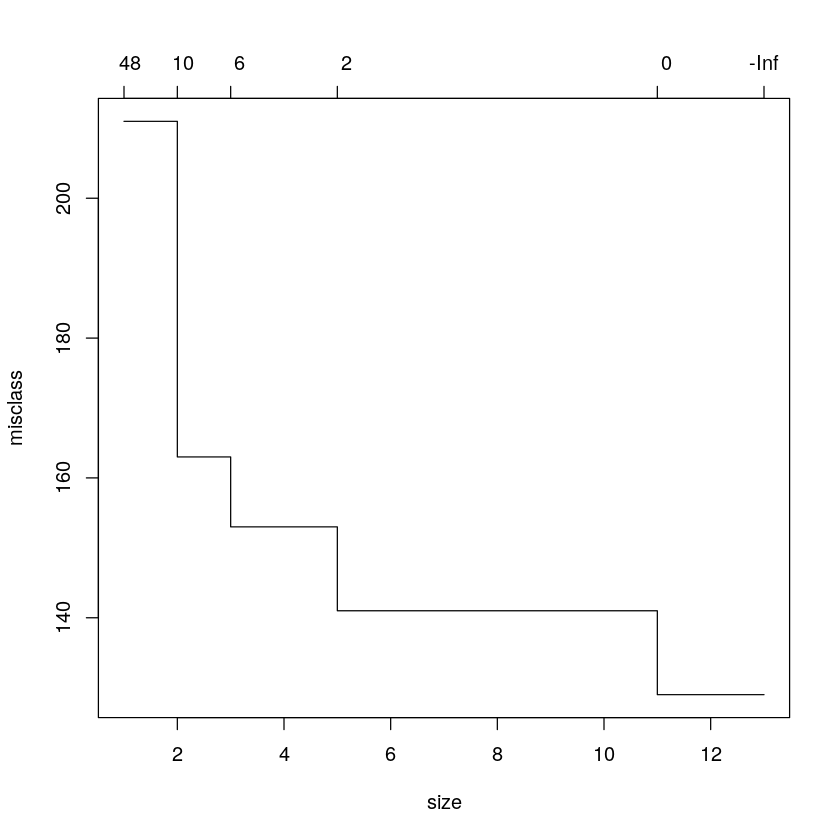

In [16]:
plot(hmeq.train1)

 6부터 큰 변화가 없으므로 6 정도가 적절할 것으로 보인다

In [17]:
fin.train=prune.misclass(hmeq_train, best=6)

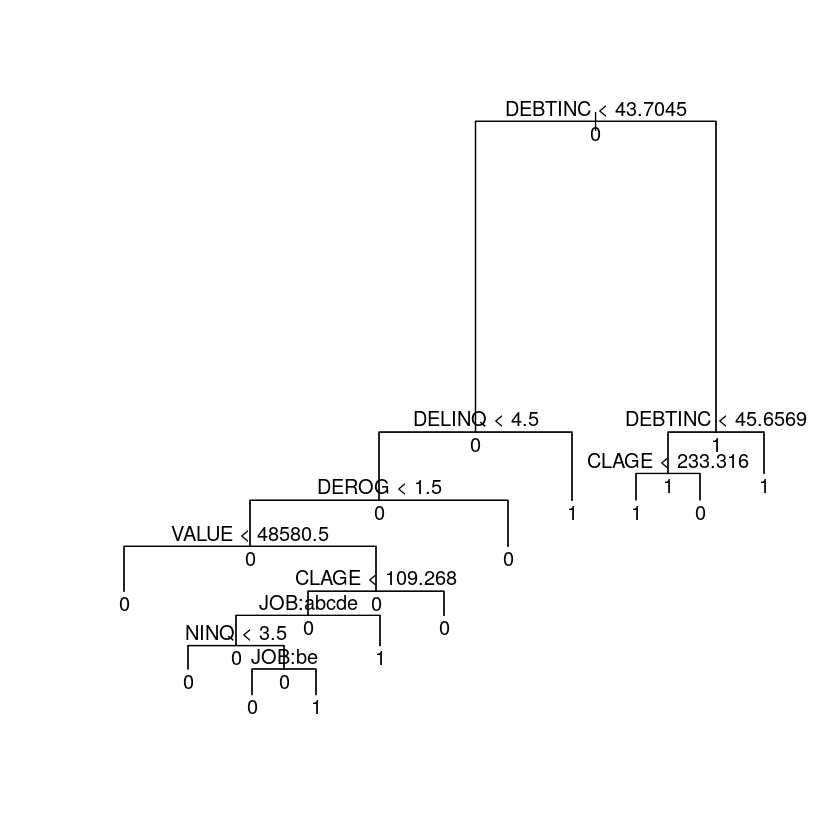

In [18]:
plot(fin.train)
text(fin.train, all=T)

In [19]:
summary(fin.train)


Classification tree:
snip.tree(tree = hmeq_train, nodes = c(16L, 35L))
Variables actually used in tree construction:
[1] "DEBTINC" "DELINQ"  "DEROG"   "VALUE"   "CLAGE"   "JOB"     "NINQ"   
Number of terminal nodes:  11 
Residual mean deviance:  0.3678 = 913.3 / 2483 
Misclassification error rate: 0.05172 = 129 / 2494 

In [20]:
fin.train

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 2494 1446.000 0 ( 0.91540 0.08460 )  
    2) DEBTINC < 43.7045 2414 1108.000 0 ( 0.93911 0.06089 )  
      4) DELINQ < 4.5 2404 1051.000 0 ( 0.94301 0.05699 )  
        8) DEROG < 1.5 2333  928.300 0 ( 0.94985 0.05015 )  
         16) VALUE < 48580.5 138  133.600 0 ( 0.81159 0.18841 ) *
         17) VALUE > 48580.5 2195  757.500 0 ( 0.95854 0.04146 )  
           34) CLAGE < 109.268 376  223.600 0 ( 0.91223 0.08777 )  
             68) JOB: ,Mgr,Office,Other,ProfExe 371  198.500 0 ( 0.92453 0.07547 )  
              136) NINQ < 3.5 347  147.300 0 ( 0.94524 0.05476 ) *
              137) NINQ > 3.5 24   31.760 0 ( 0.62500 0.37500 )  
                274) JOB: Mgr,ProfExe 13    0.000 0 ( 1.00000 0.00000 ) *
                275) JOB: Office,Other 11   10.430 1 ( 0.18182 0.81818 ) *
             69) JOB: Sales,Self 5    0.000 1 ( 0.00000 1.00000 ) *
           35) CLAGE > 109.268 1819  513.800 0 ( 0.96811 0.0

## test data에 적용 

In [21]:
testPred <- predict(hmeq_train, newdata = testData, type="class")
table(testPred, testData$BAD)

        
testPred    0    1
       0 1397  322
       1    9   31

In [23]:
library(caret)
confusionMatrix(testData$BAD, testPred)

Loading required package: lattice

Loading required package: ggplot2



Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1397    9
         1  322   31
                                          
               Accuracy : 0.8118          
                 95% CI : (0.7928, 0.8298)
    No Information Rate : 0.9773          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1219          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.81268         
            Specificity : 0.77500         
         Pos Pred Value : 0.99360         
         Neg Pred Value : 0.08782         
             Prevalence : 0.97726         
         Detection Rate : 0.79420         
   Detection Prevalence : 0.79932         
      Balanced Accuracy : 0.79384         
                                          
       'Positive' Class : 0               
                        

$$ Accuracy = \frac {1397 + 31} {1397 + 322 + 31 + 9}$$
정확도는 맞게 예측한 것이 어느 정도인지 봄
$$ Sensitivity = \frac {1397} {1397 + 322}$$
민감도는 0을 0으로 제대로 예측하는 경우가 중요할 때 사용됨. 이 경우는 신용도가 좋은 사람을 좋게 예측하는 것이 더 좋은 경우
$$ Specificity = \frac {31} {31 + 9}$$
특이도는 1을 1로 제대로 예측하는 것이 중요한 경우 사용

#  DecisionTree wage data regression

## 데이터 불러오기 

In [2]:
wages <- read.csv("wages-1.csv", header = T)

In [3]:
dim(wages)

[1] 1084   20

In [4]:
str(wages)

'data.frame':	1084 obs. of  20 variables:
 $ educ    : int  12 12 6 12 12 8 11 15 16 15 ...
 $ south   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nonwh   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hispanic: int  0 0 1 0 0 0 0 0 0 0 ...
 $ gender  : int  0 1 0 0 0 0 0 1 1 0 ...
 $ married : int  0 1 1 1 1 1 0 0 0 1 ...
 $ marrfem : int  0 1 0 0 0 0 0 0 0 0 ...
 $ exper   : int  8 30 38 19 11 43 2 9 17 23 ...
 $ expersq : int  64 900 1444 361 121 1849 4 81 289 529 ...
 $ union   : int  0 1 1 1 0 0 0 0 0 1 ...
 $ lnwage  : num  1.22 1.61 2.14 2.07 1.65 ...
 $ age     : int  25 47 49 36 28 56 18 29 38 43 ...
 $ manuf   : int  0 0 0 0 0 0 1 0 0 0 ...
 $ constr  : int  0 0 1 0 0 0 0 0 0 0 ...
 $ manag   : int  0 0 0 0 0 0 0 1 0 0 ...
 $ sales   : int  0 0 0 1 0 0 0 0 0 0 ...
 $ clerical: int  0 1 0 0 0 0 0 0 0 1 ...
 $ service : int  1 0 0 0 0 0 0 0 0 0 ...
 $ prof    : int  0 0 0 0 0 0 0 0 1 0 ...
 $ cps85   : int  0 0 0 0 0 0 0 0 0 0 ...


lnwage 변수가 regression의 target이 되는데 이는 자연로그(ln)가 씌워진 값이다.

In [5]:
wages[,2]=as.factor(wages[,2])
wages[,3]=as.factor(wages[,3])
wages[,4]=as.factor(wages[,4])
wages[,5]=as.factor(wages[,5])
wages[,6]=as.factor(wages[,6])
wages[,7]=as.factor(wages[,7])
wages[,10]=as.factor(wages[,10])
wages[,13]=as.factor(wages[,13])
wages[,14]=as.factor(wages[,14])
wages[,15]=as.factor(wages[,15])
wages[,16]=as.factor(wages[,16])
wages[,17]=as.factor(wages[,17])
wages[,18]=as.factor(wages[,18])
wages[,19]=as.factor(wages[,19])
wages[,20]=as.factor(wages[,20])

바이너리 변수들을 팩터화 시켜준다

## 데이터 분리 

In [6]:
set.seed(1234)
ind <- sample(2, nrow(wages), replace=TRUE, prob=c(0.7, 0.3))

In [7]:
wages.train <- wages[ind==1,]
wages.test <- wages[ind==2,]

## 모델 학습

In [8]:
wages_rpart <- rpart(lnwage~., data = wages.train, 
                       control = rpart.control(minsplit = 10))

In [10]:
attributes(wages_rpart)

$names
 [1] "frame"               "where"               "call"               
 [4] "terms"               "cptable"             "method"             
 [7] "parms"               "control"             "functions"          
[10] "numresp"             "splits"              "csplit"             
[13] "variable.importance" "y"                   "ordered"            

$xlevels
$xlevels$south
[1] "0" "1"

$xlevels$nonwh
[1] "0" "1"

$xlevels$hispanic
[1] "0" "1"

$xlevels$gender
[1] "0" "1"

$xlevels$married
[1] "0" "1"

$xlevels$marrfem
[1] "0" "1"

$xlevels$union
[1] "0" "1"

$xlevels$manuf
[1] "0" "1"

$xlevels$constr
[1] "0" "1"

$xlevels$manag
[1] "0" "1"

$xlevels$sales
[1] "0" "1"

$xlevels$clerical
[1] "0" "1"

$xlevels$service
[1] "0" "1"

$xlevels$prof
[1] "0" "1"

$xlevels$cps85
[1] "0" "1"


$class
[1] "rpart"

In [11]:
print(wages_rpart$cptable)

           CP nsplit rel error    xerror       xstd
1  0.12191522      0 1.0000000 1.0038302 0.05235887
2  0.08405143      1 0.8780848 0.8928650 0.05166451
3  0.05254787      2 0.7940334 0.8142463 0.05014785
4  0.03228514      3 0.7414855 0.7614250 0.04679488
5  0.02116927      4 0.7092003 0.7274319 0.04561742
6  0.01429957      5 0.6880311 0.7371235 0.04619435
7  0.01304124      6 0.6737315 0.7446111 0.04763170
8  0.01229514      7 0.6606903 0.7372707 0.04665443
9  0.01195528      8 0.6483951 0.7394490 0.04676157
10 0.01194877      9 0.6364398 0.7377040 0.04671829
11 0.01071079     10 0.6244911 0.7349069 0.04671868
12 0.01066049     11 0.6137803 0.7353078 0.04674937
13 0.01000000     13 0.5924593 0.7396308 0.04646130


In [12]:
print(wages_rpart)

n= 759 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 759 217.3735000 1.860493  
    2) age< 25.5 158  28.8373200 1.496058  
      4) cps85=0 93  10.6126200 1.384075 *
      5) cps85=1 65  15.3898800 1.656278  
       10) educ< 13.5 54   7.5878430 1.579189 *
       11) educ>=13.5 11   5.9057440 2.034718  
         22) educ>=14.5 7   0.2119406 1.657557 *
         23) educ< 14.5 4   2.9554830 2.694750 *
    3) age>=25.5 601 162.0351000 1.956301  
      6) cps85=0 288  62.1318400 1.774534  
       12) gender=1 105  23.3962000 1.568452 *
       13) gender=0 183  31.7177100 1.892778  
         26) educ< 11.5 55   7.2561420 1.650867 *
         27) educ>=11.5 128  19.8599200 1.996723  
           54) age< 34.5 42   3.1840260 1.789952 *
           55) age>=34.5 86  14.0032600 2.097705  
            110) educ< 14.5 56   7.7510890 1.970471 *
            111) educ>=14.5 30   3.6534110 2.335207 *
      7) cps85=1 313  81.6326800 2.123550  
       14) educ< 12.5 181  40.

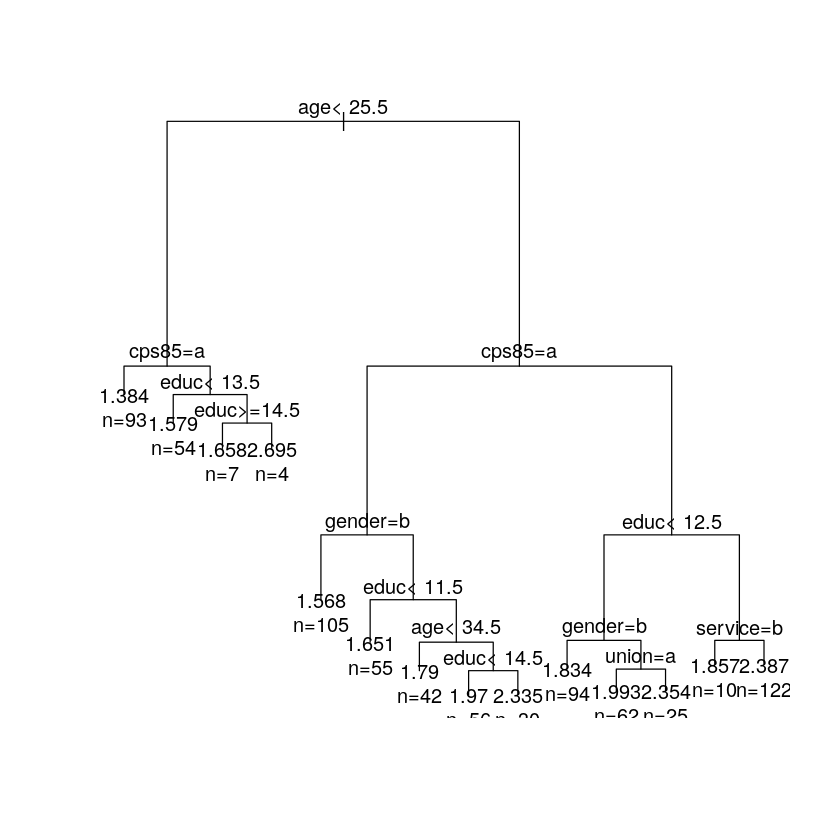

In [13]:
plot(wages_rpart)
text(wages_rpart, use.n=T)

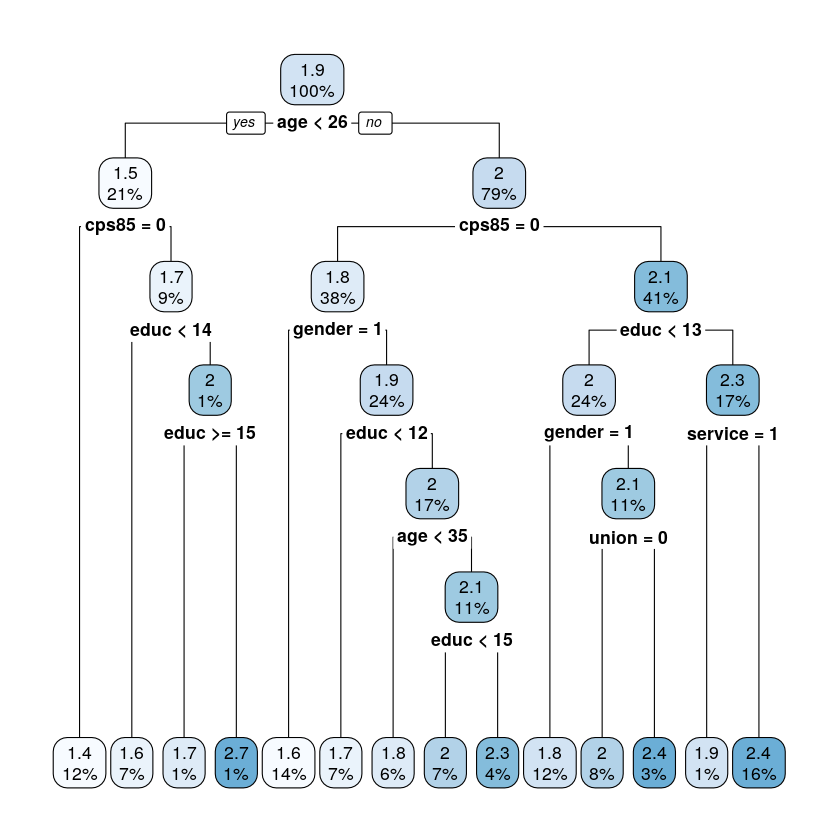

In [17]:
rpart.plot(wages_rpart)

rpart.plot 라이브러리로 시각화할 수 있음

cps85는 조사 시점으로 85년 이후 조사인지 이전 조사인지 나타내는 변수이다. 85년 시점이 no인 이전 조사의 가지에서는 gender가 더 높은 영향을 미치고 85년 조사에서는 성별보다는 교육 수준이 더 큰 영향을 끼친다는 해석이 가능하다.

## test 적용 

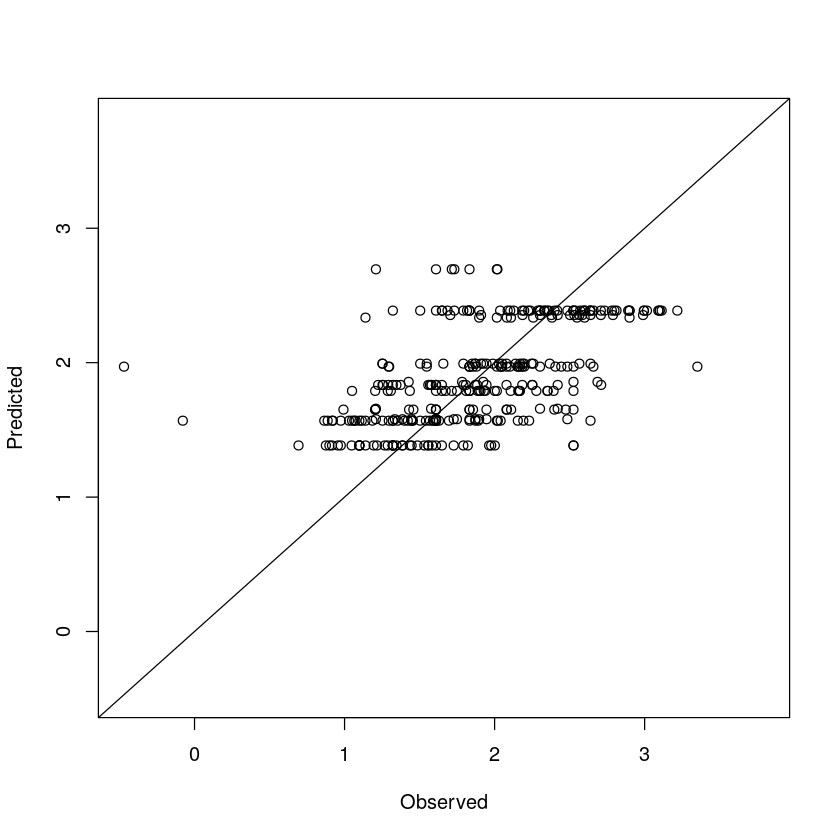

In [20]:
wages_pred <- predict(wages_rpart, newdata=wages.test)
xlim <- range(wages$lnwage)
plot(wages_pred ~ lnwage, data=wages.test, xlab="Observed", 
     ylab="Predicted", ylim=xlim, xlim=xlim)
abline(a=0, b=1) #일직선 그려줌

점들이 마치 범주처럼 위치해있는데 이는 변수를 범주화시키는 의사결정나무의 특징이다.